# **Ensemble Learning**

Ensemble means 'a collection or a group'. If we collect and combine different ML models and create a model out of it, this technique is called Ensemble Learning.

**Wisdom of the crowd:** Wisdom of the crowd is a theory that assumes large crowds are collectively smarter than individual experts. It believes that the collective knowledge and opinions of a group are better at decision-making, problem-solving, and innovating than an individual.

**Core Idea of Ensemble Learning:** There are 2 steps related with any ML model i.e Training and Prediction.

Suppose in prediction, we a collection of different models and we are making a model out of these called a Ensemble Model. We must ensure that all these models are different from each other.

By having different models we mean that (a) either all the models have different algorithms or (b) if the algorithm is same then all the models are trained on different data. Another apprach can be we use different algorithms and train the models on different data, both at the (a) and (b) at the same time.










**Example for how is predicition done in Ensemble Learning:** Suppose,  we had a dataset which includes cgpa, iq and placement to see if the student is placed or not on the basis of iq and cgpa. Now, in our ensembled model if 3 models predicted the student will be placed and 2 predicted student will not be placed.

Then, out of majority, it will be decided that the student is placed.

This is how the prediction is done in Ensemble Learning but the data is trained on the basis of what type of Ensemble Learning is used.

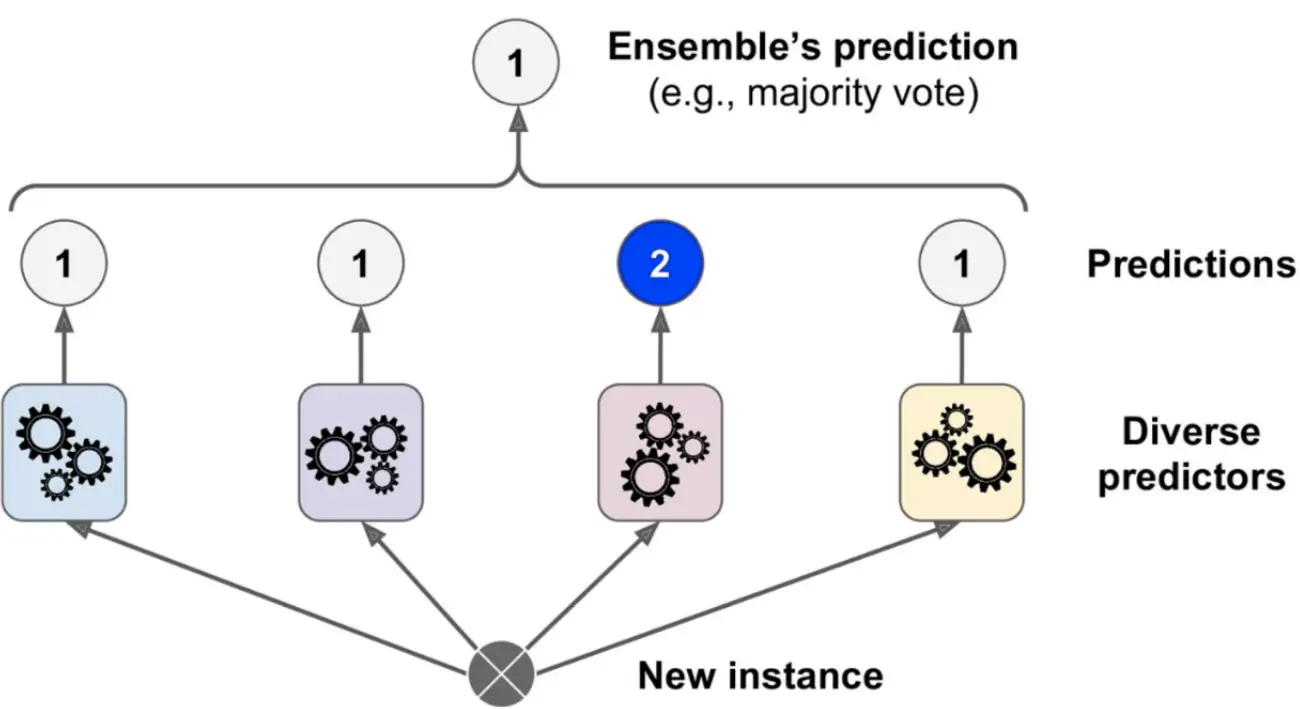

**Types of Ensemble Learning:** 

* Voting Ensemble
* Bagging Ensemble: Random Forest

* Boosting Ensemble: Adaboost , Gradient Boosting , XGBoost

* Stacking Ensemble


**But why do we need different types of Ensemble techniques?**

This is because as we had already discussed about the above two techniques that either we should have same algorithm and different data or different algorithms. This helps in biulding different bases and different types of techniques.

**ESSENCE OF THESE TECHNIQUES**

**Voting Ensemble**: The base models are different algorithm, they are getting the same data. The final prediction will be given by a voting count or if it is a regression problem we would calculate the mean. Since, there are different algorithms if gives variety in the data and it gives you better results.

**Stacking Ensemble:** It is very close to Voting Ensemble. Here after the different models we get another data which was predicted by them.

working: for example, for students placed or not, different algorithms gave 0 , 1 ,1 ,0...
Now this will be passed on to another algorithm and it will assign additional weightage to the previous models and it will become easier to find out which model is working much better.

**Bagging Ensemble:** Bagging stands for Bootstrap aggregation. In this type of technique, we have the same algorithm working in different models but with different data given to each of them. 

Working: for example we had the data of 1000 students then randomly data of 500 stu will be fed to model1 and the data will be returned back to original data, again randomly data of 500 students will be fed to model2 and returned back to original data and this goes on for all models.

These models have same ML algoritms but since they have different data they will be trained differently and this is where we get variety.
Again, the predicitions will be selected on voting count.

**Boosting Ensemble:** Again we have same algorithms working, the data is given to the first model and it focuses on the mistakes made by the first model. Now when the data is given to model2 it gives silghtly improved results and it forwards the mistakes made to the next model and it works on them and gives better results.

Thus, we can say that in this technique we are boosting the data.

* Random Forests are special cases for Bagging Ensemble where the base models are Decision Trees.

**Why Ensemble Learning works?**

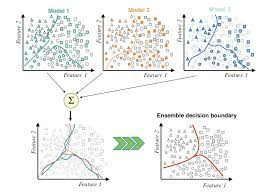



Ensemble Learnings takes the predictions of the models and gives a comparative output from these and gives a smooth result.

**Advantages**: 

* improvement in performance.

* reduces the bias and variance. The end goal is always to have low bias and low variance.

* Robustness: For a machine learning algorithm to be considered robust, either the testing error has to be consistent with the training error, or the performance is stable after adding some noise to the dataset.

**Disadvantages:**

* need to train multiple models which creates complexiety.



**When to use?**

Simply, ALWAYS!

It is always helpful to use Ensemble learning it alwaysss helps in achiving better results.

# **Voting Ensemble in detail**

**Intuition:** creating multiple models over a dataset with different/same working algorithms. Mdels are independently trained on the same data. Then each of the model gives predicitions and based on voting count, the predicitions are selected. Or if it is a regression problem then the mean of the outputs is taken.


**Why voting works?**

Usually in voting ensemble if we had three models with accuracy 0.7,0.66,0.55 but then the final model gives the accuracy of 0.8. How?
To know this we must first consider the assumptions beind Voting Ensemble.


Ensemble learning methods work by combining the mapping functions learned by contributing members. Ensembles for classification are best understood by the combination of decision boundaries of members.Ensembles for regression are best understood by the combination of hyperplanes of members.

**Assumptions:** 

* All the base models should be independent.

* The accuracy of all the models individiually should be atleast 50%.


**Conclusion:** Here it means that we are combining weak models to create a stronger model. 

**Voting Ensemble in Classification:** we have base models m1,m2,m3 trained over a dataset D. Suppose m1 gives 0 , m2 gives 1 , m3 gives 0. Here 0 will be selected as per voting count.

**Voting_type:** hard and soft

Hard voting entails picking the prediction with the highest number of votes, whereas soft voting entails combining the probabilities of each prediction in each model and picking the prediction with the highest total probability.


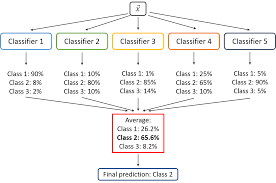

Generally, Soft voting gives better results than Hard voting but not alwways. So while working on a project we must always try both and test which hyperparameter works the best.

# Code:

In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns

In [2]:
from google.colab import files

In [3]:
file = files.upload()

Saving Iris.csv to Iris.csv


In [4]:
df = pd.read_csv('Iris.csv')

In [5]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
#remove id column
df=df.iloc[:,1:]

In [7]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
#label encode species
from sklearn.preprocessing import LabelEncoder

In [9]:
encoder = LabelEncoder()

In [10]:
df['Species'] = encoder.fit_transform(df['Species'])

In [11]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


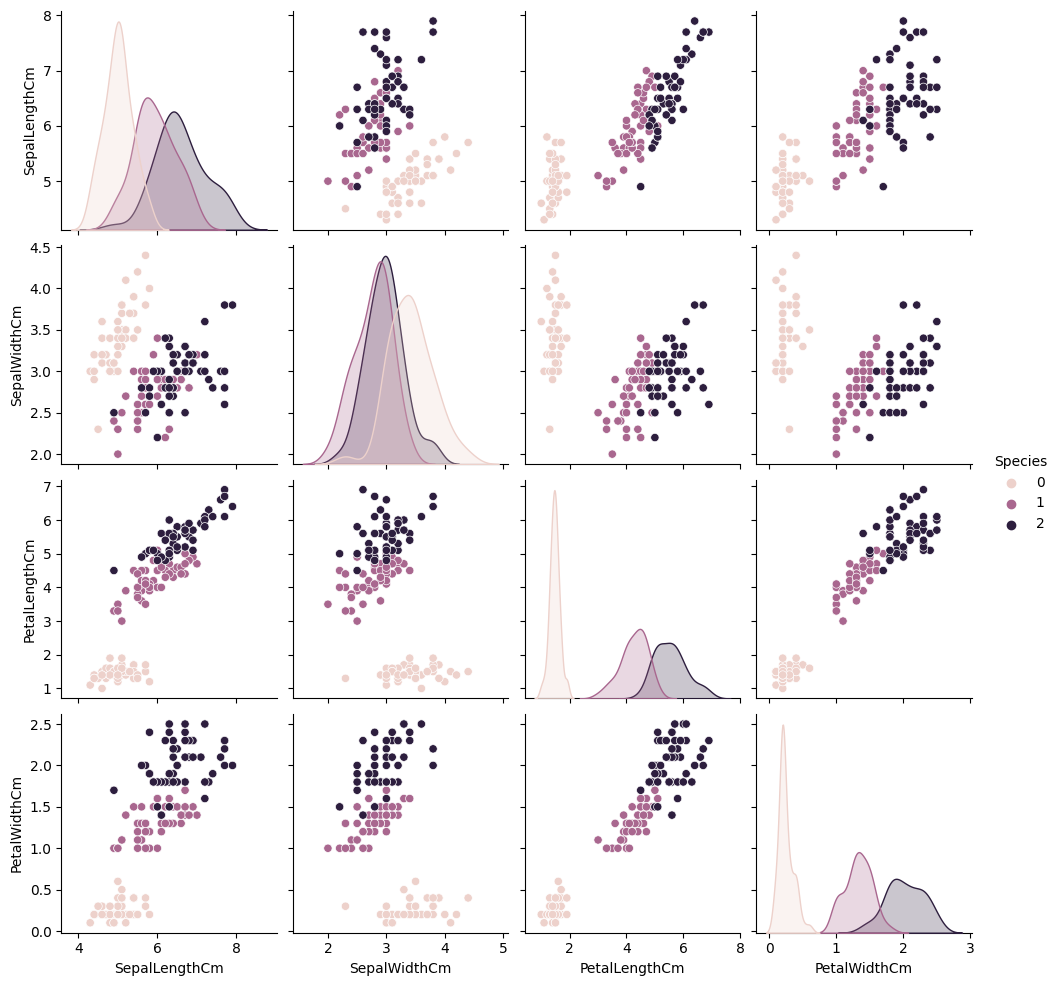

In [12]:
sns.pairplot(df , hue = 'Species')

In [13]:
#removing 2 columns, keeping only SepalLength , SepalWidth . Removing Setosa as well, keeping virginica and versicolor.
new_df = df[df['Species']!=0][['SepalLengthCm' , 'SepalWidthCm' , 'Species']]


In [14]:
new_df.head()

,SepalLengthCm,SepalWidthCm,Species
50,7.0,3.2,1
51,6.4,3.2,1
52,6.9,3.1,1
53,5.5,2.3,1
54,6.5,2.8,1


In [15]:
X = new_df.iloc[:,0:2]
y = new_df.iloc[:,-1]

In [16]:
new_df.shape

(100, 3)

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import cross_val_score

In [18]:
clf1 = LogisticRegression()
clf2 = RandomForestClassifier()
clf3 = KNeighborsClassifier()

In [19]:
estimators = [('lr',clf1) , ('rf',clf2) , ('knn',clf3)]

In [20]:
for estimator in estimators:
  x = cross_val_score(estimator[1],X,y,cv=10,scoring='accuracy')
  print(estimator[0],np.round(np.mean(x),2))

lr 0.75
rf 0.59
knn 0.61


In [21]:
from sklearn.ensemble import VotingClassifier

# Hard Voting

In [22]:
vc = VotingClassifier(estimators = estimators)
x = cross_val_score(vc,X,y,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))

0.67


# Soft Voting

In [23]:
vc1 = VotingClassifier(estimators = estimators  , voting = 'soft')
x = cross_val_score(vc,X,y,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))

0.68


# Weighted Voting

In [24]:
for i in range(1,4):
  for j in range(1,4):
    for k in range(1,4):
      vc = VotingClassifier(estimators = estimators , voting='soft',weights=[i,j,k])
      x = cross_val_score(vc,X,y,cv=10,scoring='accuracy')
      print('for i={} , j={} , k={}'.format(i,j,k),np.round(np.mean(x),2))

for i=1 , j=1 , k=1 0.67
for i=1 , j=1 , k=2 0.64
for i=1 , j=1 , k=3 0.63
for i=1 , j=2 , k=1 0.65
for i=1 , j=2 , k=2 0.65
for i=1 , j=2 , k=3 0.64
for i=1 , j=3 , k=1 0.62
for i=1 , j=3 , k=2 0.63
for i=1 , j=3 , k=3 0.63
for i=2 , j=1 , k=1 0.69
for i=2 , j=1 , k=2 0.67
for i=2 , j=1 , k=3 0.65
for i=2 , j=2 , k=1 0.63
for i=2 , j=2 , k=2 0.67
for i=2 , j=2 , k=3 0.65
for i=2 , j=3 , k=1 0.63
for i=2 , j=3 , k=2 0.66
for i=2 , j=3 , k=3 0.65
for i=3 , j=1 , k=1 0.71
for i=3 , j=1 , k=2 0.69
for i=3 , j=1 , k=3 0.68
for i=3 , j=2 , k=1 0.69
for i=3 , j=2 , k=2 0.68
for i=3 , j=2 , k=3 0.67
for i=3 , j=3 , k=1 0.64
for i=3 , j=3 , k=2 0.66
for i=3 , j=3 , k=3 0.66


# Classifiers of same algo

In [25]:
from sklearn.datasets import make_classification
from sklearn.svm import SVC

X,y = make_classification(n_samples=1000 , n_features=20 , n_informative=15 , n_redundant=5 , random_state=2)

svm1 = SVC(probability=True, kernel='poly', degree=1)
svm2 = SVC(probability=True, kernel='poly', degree=2)
svm3 = SVC(probability=True, kernel='poly', degree=3)
svm4 = SVC(probability=True, kernel='poly', degree=4)
svm5 = SVC(probability=True, kernel='poly', degree=5)

estimators = [('svm1',svm1) , ('svm2',svm2), ('svm3',svm3), ('svm4',svm4), ('svm5',svm5)]

for estimator in estimators:
  x = cross_val_score(estimator[1],X,y,cv=10,scoring='accuracy')
  print(estimator[0],np.round(np.mean(x),2))

svm1 0.85
svm2 0.85
svm3 0.89
svm4 0.81
svm5 0.86


In [26]:
#putting these in voting classifier
vc1 = VotingClassifier(estimators=estimators , voting='soft')
x = cross_val_score(vc1,X,y,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))

0.93


**Inference:** Thus, we can say the final model from voting classifier gives even better result than singular  models at a time.

**Voting Ensemble in Regression:** We have to predict a point y for regression problem, the three models which we have give values, since this is regression we will take the mean of all the three as the final result.




# Code:

In [27]:
from sklearn.datasets import load_diabetes
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [28]:
X,y = load_diabetes(return_X_y=True) 

In [29]:
X.shape

(442, 10)

In [30]:
y.shape

(442,)

In [31]:
X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

In [33]:
lr = LinearRegression()
dt = DecisionTreeRegressor()
svr = SVR()

In [34]:
estimators = [('lr', lr) , ('dt' , dt) , ('svr' , svr)]

In [35]:
for estimator in estimators:
  scores = cross_val_score(estimator[1],X,y,scoring='r2')
  print(estimator[0],np.round(np.mean(scores),2))

lr 0.48
dt -0.16
svr 0.15


In [36]:
from sklearn.ensemble import VotingRegressor

In [37]:
vr = VotingRegressor(estimators)
scores = cross_val_score(vr,X,y,scoring='r2')
print('voting regressor',np.round(np.mean(scores),2))

voting regressor 0.38


In [38]:
for i in range(1,4):
  for j in range(1,4):
    for k in range(1,4):
      vc = VotingRegressor(estimators ,weights=[i,j,k])
      x = cross_val_score(vr,X,y,cv=10,scoring='r2')
      print('for i={} , j={} , k={}'.format(i,j,k),np.round(np.mean(scores),2))

for i=1 , j=1 , k=1 0.38
for i=1 , j=1 , k=2 0.38
for i=1 , j=1 , k=3 0.38
for i=1 , j=2 , k=1 0.38
for i=1 , j=2 , k=2 0.38
for i=1 , j=2 , k=3 0.38
for i=1 , j=3 , k=1 0.38
for i=1 , j=3 , k=2 0.38
for i=1 , j=3 , k=3 0.38
for i=2 , j=1 , k=1 0.38
for i=2 , j=1 , k=2 0.38
for i=2 , j=1 , k=3 0.38
for i=2 , j=2 , k=1 0.38
for i=2 , j=2 , k=2 0.38
for i=2 , j=2 , k=3 0.38
for i=2 , j=3 , k=1 0.38
for i=2 , j=3 , k=2 0.38
for i=2 , j=3 , k=3 0.38
for i=3 , j=1 , k=1 0.38
for i=3 , j=1 , k=2 0.38
for i=3 , j=1 , k=3 0.38
for i=3 , j=2 , k=1 0.38
for i=3 , j=2 , k=2 0.38
for i=3 , j=2 , k=3 0.38
for i=3 , j=3 , k=1 0.38
for i=3 , j=3 , k=2 0.38
for i=3 , j=3 , k=3 0.38


# **Bagging Ensemble in detail**

The word bagging comes from **B**ootstrapping and **agg**regation.

**Core Idea:**  Lets take a dataset which has 10K rows. It has multiple base models; model1, model2, ... , modeln. All the models should be based on the same algorithm. Then comes training of the models, different data is given to each model.

From this dataset of 10K rows, we use sampling and extract 1K rows from it which is called a dataset D1, then we again have D2 containing different rows since sampling is done and rows are chosen randomly. This extraction process and creating different datasets is called BOOTSTRAPPING.

Now the models are trained on datasets D1,D2..etc.
Let us assume we have a new query point Xq , this is given to all models and Since all the models are classification, they will predict either 0 or 1. 
So, if majority classifiers will say the output 0, the Bagging classifier will also say 0. We used the mode method or majority count. This picking of majority count is known as AGGREGATION.

**Why is Bagging done and how does the performance improves here?**

In machine learning, we always want a low Bias and low Variance model. The Bias and the Variance are negatively correlated. Due to this negative correlation, most of the models have either Low Bias High Variance or High Bias Low Variance. Thus, Bagging helps to achieve the ideal condition of Low Bias and Low Variance.

**Lets revise:** Bias is the inability of an Machine Learning algorithm to fit into its training data.
 
Variance refers to the changes in the model when using different portions of the training data set. Simply stated, variance is the variability in the model prediction—how much the ML function can adjust depending on the given data set.


**Bagging Cassification Code:** 

In [68]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score 
from sklearn.ensemble import BaggingClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [69]:
X,y = make_classification(n_samples=10000, n_features=10, n_informative=3)

In [70]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [71]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)

print('accuarcy of Tree: ',accuracy_score(y_test,y_pred))

accuarcy of Tree:  0.8735


In [72]:
#bagging
bag = BaggingClassifier(
    base_estimator = DecisionTreeClassifier(),
    n_estimators=500,
    max_samples=0.25,
    bootstrap=True,
    random_state=42
)

In [73]:
bag.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.25,
                  n_estimators=500, random_state=42)

In [74]:
y_pred = bag.predict(X_test)

In [75]:
accuracy_score(y_test,y_pred)

0.918

In [76]:
#bagging using SVM
bag = BaggingClassifier(
    base_estimator=SVC(),
    n_estimators=500,
    max_samples=0.25,
    bootstrap = True,
    random_state=42
)

In [77]:
bag.fit(X_train,y_train)
y_pred=bag.predict(X_test)
print('bagging using SVM',accuracy_score(y_test,y_pred))

bagging using SVM 0.9015


**Pasting:** Pasting is an ensemble technique similar to bagging except for the fact that in pasting sampling is done without replacement i.e. an observation can be present in only one subset.

In [78]:
#pasting
bag = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=500,
    max_samples=0.25,
    bootstrap = False,
    random_state=42,
    verbose=1,
    n_jobs=-1
)

In [79]:
bag.fit(X_train,y_train)
y_pred = bag.predict(X_test)
print('Pasting Classifier',accuracy_score(y_test,y_pred))

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:   11.3s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:   11.3s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Pasting Classifier 0.9175


[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.4s finished


In [80]:
#random subspaces
bag = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators = 500,
    max_samples=1.0,
    bootstrap=False,
    max_features=0.5,
    bootstrap_features=True,
    random_state=42
)

In [81]:
bag.fit(X_train,y_train)
y_pred=bag.predict(X_test)
print('Random subspaces classifier',accuracy_score(y_test,y_pred))

Random subspaces classifier 0.901


# Bagging Tips:
* Bagging generally gives better results thn Pasting.
* Good reults come out around 25% to 50% row sampling mark.
* Random patches and subspaces should be used while dealing with high dimensional data. 
* To find the correct hyperparameter values we can do GridSearchCV/RandomSearchCV


**Bagging Regressor:** Different models are created and give numerical values since this is a regression problem. During aggregation, mean is taken. 

**Code:**

In [82]:
from sklearn import datasets

diabetes = datasets.load_diabetes()
X_diabetes, y_diabetes = diabetes.data, diabetes.target
print('Dataset features names: '+str(diabetes.feature_names))
print('Dataset features names: '+str(diabetes.data.shape))
print('Dataset features names: '+str(diabetes.target.shape))

Dataset features names: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
Dataset features names: (442, 10)
Dataset features names: (442,)


In [83]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [84]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=123)
print('Train/Test sets sizes:',X_train.shape,X_test.shape,y_train.shape,y_test.shape)

Train/Test sets sizes: (8000, 10) (2000, 10) (8000,) (2000,)


In [85]:
lr = LinearRegression()
dt = DecisionTreeRegressor()
knn = KNeighborsRegressor()


In [86]:
lr.fit(X_train,y_train)
dt.fit(X_train,y_train)
knn.fit(X_train,y_train)

KNeighborsRegressor()

In [87]:
y_pred1 = lr.predict(X_test)
y_pred2 = dt.predict(X_test)
y_pred3 = knn.predict(X_test)

In [88]:
print('r2 score for LR: ',r2_score(y_test,y_pred))
print('r2 score for DT: ',r2_score(y_test,y_pred))
print('r2 score for KNN: ',r2_score(y_test,y_pred))

r2 score for LR:  -0.8501498621388328
r2 score for DT:  -0.8501498621388328
r2 score for KNN:  -0.8501498621388328


In [89]:
from sklearn.ensemble import BaggingRegressor

bag_regressor = BaggingRegressor(random_state=1)
bag_regressor.fit(X_train,y_train)

BaggingRegressor(random_state=1)

In [90]:
y_pred = bag_regressor.predict(X_test)

print('Training coefficient of R2: %0.3f'%bag_regressor.score(X_train,y_train))
print('Test coefficient of R2: %0.3f'%bag_regressor.score(X_test,y_test))


Training coefficient of R2: 0.948
Test coefficient of R2: 0.703
